# Wizualizacja danych w `matplotlib` i `seaborn`

## Wykres liniowy

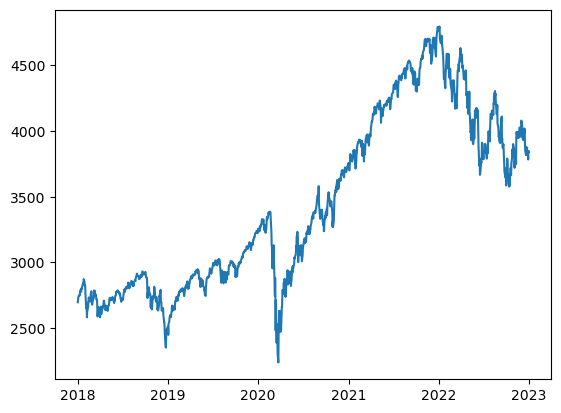

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

plt.plot(df.index, df.Close) # Wskazówka: jeśli jedną z osi są daty, warto zapewnić typ danych datetime

## Dodawanie wielu wykresów, tytułów, legendy

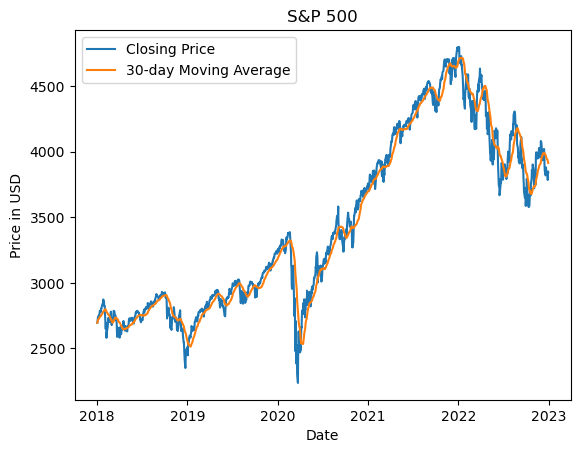

In [3]:
plt.plot(df.index, df.Close, label="Closing Price")
plt.plot(df.index, df.Close.rolling('30D').mean(), label="30-day Moving Average")

plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()

## Histogram

Text(0.5, 1.0, 'Histogram of Sepal Width')

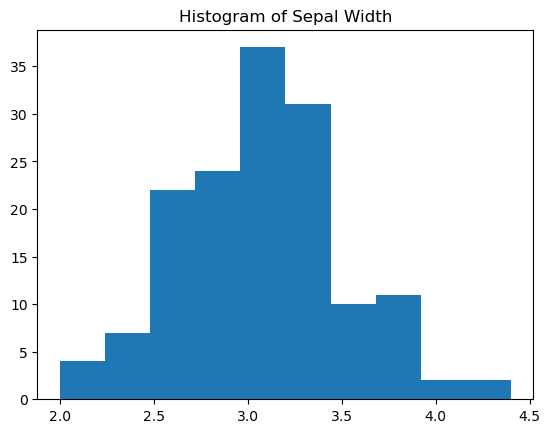

In [4]:
iris = pd.read_csv("iris.csv")

plt.hist(iris.sepal_width, bins=10)
plt.title("Histogram of Sepal Width")

## Wykres pudełkowy

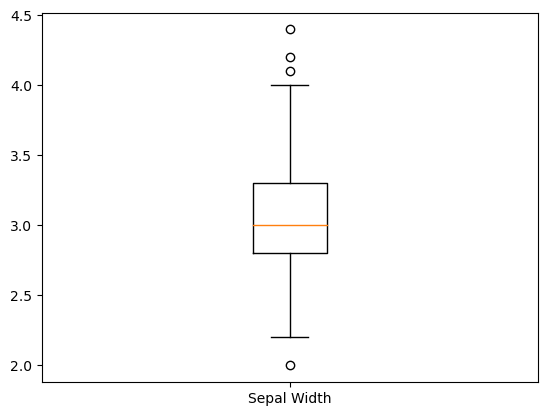

In [5]:
plt.boxplot(iris.sepal_width, labels=["Sepal Width"]);

Aby stworzyć kilka wykresów pudełkowych można podać listę zawierającą kilka wektorów z danymi numerycznymi, lub `DataFrame`. Parametr `vert` pozwala rysować wykres w pionie lub poziomie.

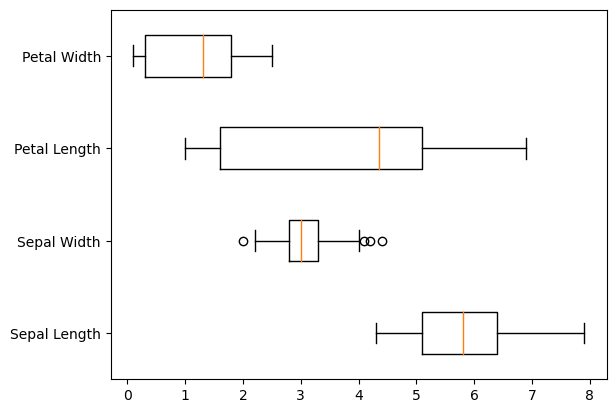

In [6]:
iris_numeric = iris.drop("variety", axis=1)
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.boxplot(iris_numeric, labels=tick_labels, vert=False);

## Wykres słupkowy
Wykres słupkowy pionowy tworzymy metodą `plt.bar()`, a poziomy `plt.barh()`. Na wykresie możemy zaznaczyć błędy pomiaru podając `yerr`, lub `xerr` - w tym przypadku zaznaczam 2SE (przybliżona szerokość 95% przedziału ufności). W poniższym przykładzie ilustruję też dodawanie napisów metodą `plt.annotate()`.

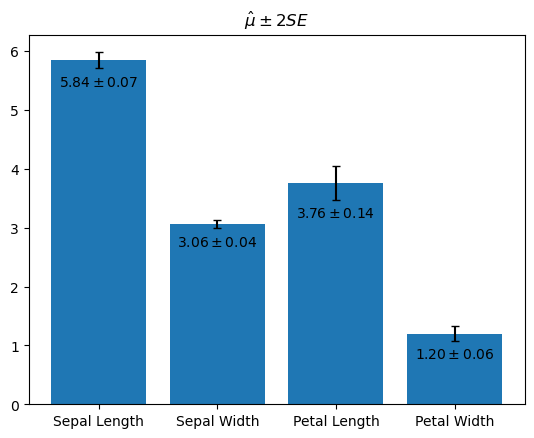

In [7]:
SE = iris_numeric.apply(lambda x: x.std()/(x.size**0.5), axis=0) # SE = sigma/sqrt(n)

plt.bar(iris_numeric.columns, iris_numeric.mean(), yerr=2*SE, capsize=3)

plt.title(r"$\hat{\mu} \pm 2SE$")
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
plt.xticks(ticks=iris_numeric.columns, labels=tick_labels)

for col in iris_numeric:
    mu = iris_numeric[col].mean()
    plt.annotate(text=f"${mu:.2f} \pm {SE[col]:.2f}$", 
                 xy=(col, mu-2*SE[col]-0.3), 
                 horizontalalignment='center')

## Wykres punktowy

Text(0, 0.5, 'Petal Width')

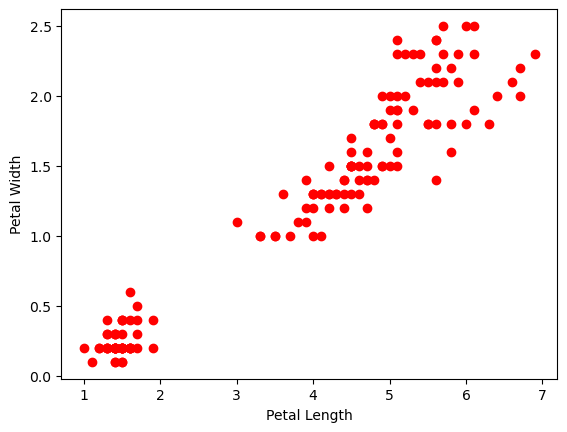

In [8]:
plt.scatter(x="petal_length", y="petal_width", c="r", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Dodawanie koloru do wykresu
W przykładzie powyżej ustawiliśmy czerwony kolor punktów podając `c="r"`. Możliwe jest także podanie wektora zawierającego kolor każdego punktu.

Text(0, 0.5, 'Petal Width')

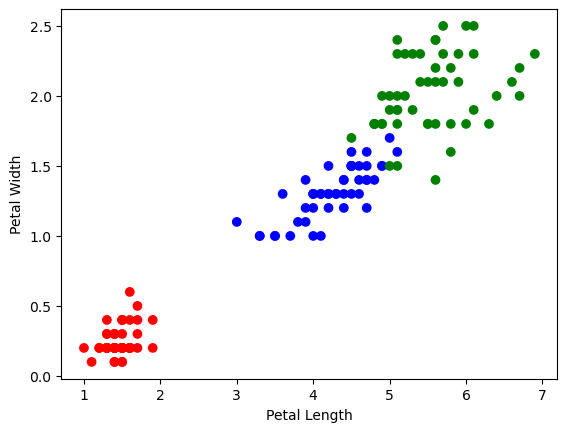

In [9]:
color = iris.variety.map({"Setosa": "r", "Versicolor": "b", "Virginica": "g"})

plt.scatter(x="petal_length", y="petal_width", c=color, data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Alternatywną metodą jest podanie kodów 0, 1, 2, ..., które zostaną automatycznie mapowane na kolory. Takie kody można wygenerować np. metodą `factorize()`. Opcjonalnie można podać mapę kolorów `cmap` ([więcej o mapach kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

Text(0, 0.5, 'Petal Width')

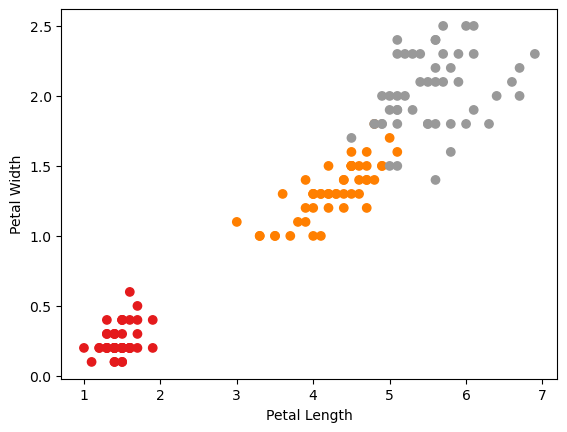

In [10]:
codes, uniques = iris.variety.factorize()
plt.scatter(x="petal_length", y="petal_width", c=codes, cmap='Set1', data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Mapowanie kolumny kategorycznej na kolor jest dużo prostsze w Seaborn:

Text(0, 0.5, 'Petal Width')

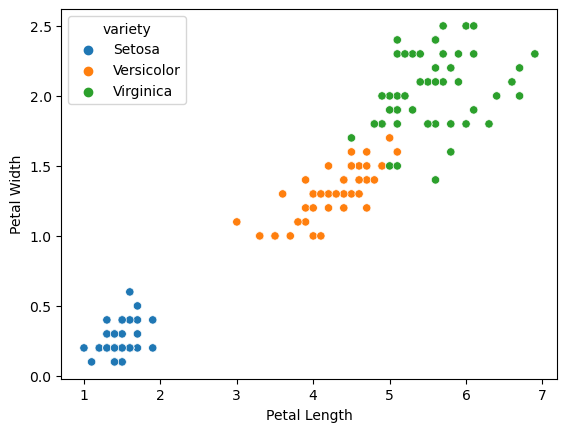

In [11]:
import seaborn as sns
sns.scatterplot(x="petal_length", y="petal_width", hue="variety", data=iris)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

Działa to też np. w `sns.boxplot()` (dane trzeba przedtem wstępnie przekształcić w format 'długi').

<Axes: xlabel='Measurement', ylabel='Value'>

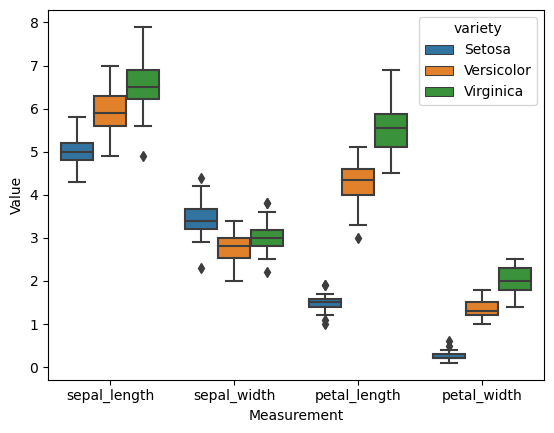

In [12]:
iris_long = iris.melt(id_vars="variety", 
                      value_vars=iris.columns[:-1], 
                      var_name="Measurement", 
                      value_name="Value")
sns.boxplot(x=iris_long.Measurement, 
            y=iris_long.Value, 
            hue=iris_long.variety, 
            orient='v')

## `subplots()`
Aby tworzyć wiele wykresów na jednej figurze wykorzystujemy metodę `plt.subplots()` podając jako argumenty liczbę wierszy i kolumn. Metoda zwraca obiekt `Figure` i `np.array` zawierający odpowiednie osie (`Axes`), na których możemy tworzyć wykresy tymi samymi metodami, które są dostępne bezpośrednio w `plt`. Często metoda `subplots()` jest przydatna nawet jeśli tworzymy tylko jeden wykres, ponieważ daje kontrolę nad parametrami figury (możemy np. ustawić jej rozmiar).

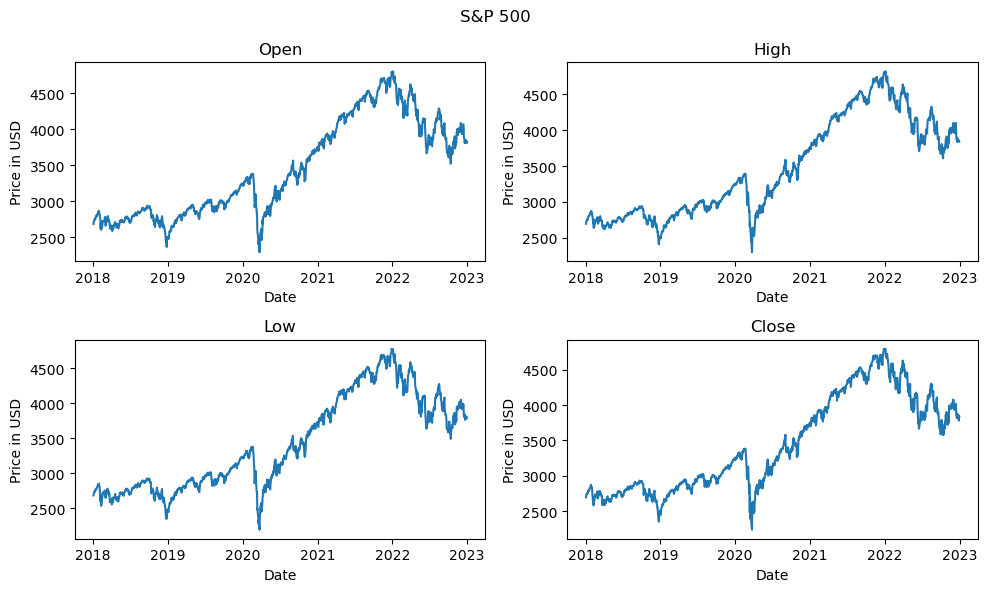

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # Rozmiar w calach

for col, ax in zip(df.columns[:4], axes.ravel()):
    ax.plot(df.index, df[col])
    ax.set_title(col)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price in USD")

fig.suptitle("S&P 500")
fig.tight_layout() # Zapewnia miejsce na tytuły wykresów

## `pairplot()`
Bardzo przydatnym narzędziem we wstępnej eksploracji danych są wykresy par zmiennych, tzw. *pairplot* lub *scatter matrix*. 

c:\Users\micha\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


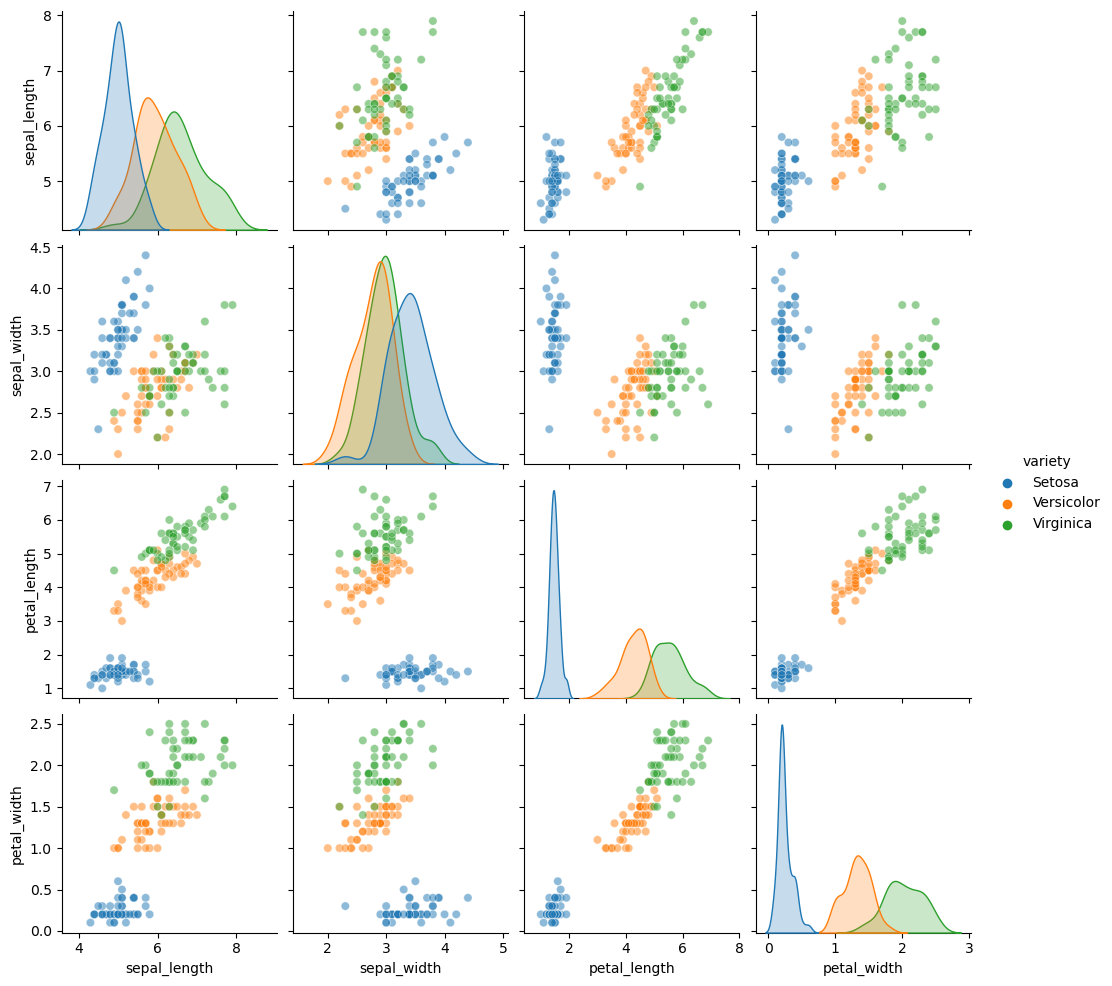

In [14]:
sns.pairplot(data=iris, hue="variety", plot_kws={'alpha': 0.5})

W niektóych przypadkach, np. kiedy mamy bardzo wiele zmiennych, wygodniej jest zwizualizować macierz korelacji. Nadaje się do tego wykres `heatmap`.

Text(0.5, 1.0, 'Correlation Matrix')

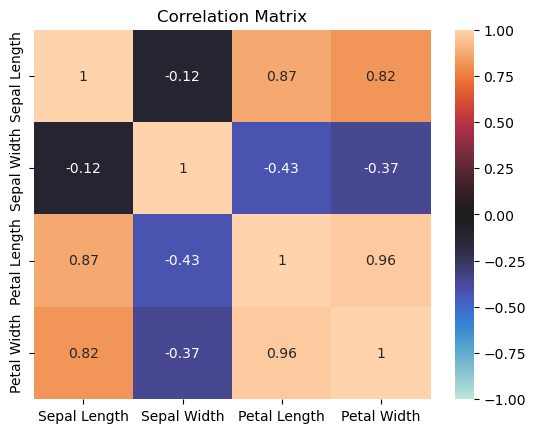

In [15]:
tick_labels = iris_numeric.columns.str.replace("_", " ").str.title()
sns.heatmap(data=iris.corr(numeric_only=True), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            center=0, 
            xticklabels=tick_labels, 
            yticklabels=tick_labels)
plt.title("Correlation Matrix")

## Zadania

1. Wczytaj plik `SP500.csv`, a następnie:
    - Stwórz histogram dziennych obrotów (`Volume`). Wybierz odpowiednią liczbę koszyków parametrem `bins`. Sprawdź w [dokumentacji `hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), jak stworzyć histogram gęstości.
    - Rozkład dziennych obrotów wizualizuj także za pomocą wykresu pudełkowego.
    - Wskazówka: bardziej czytelne będą wykresy dla dziennych obrotów w mln szt. (`Volume / 10e6`). W przypadku skalowania danych, pamiętaj o zaznaczeniu tego na wykresie (np. w opisie osi).

2. Wczytaj plik `waw_weather_monthly.csv`, a następnie:
    - Stwórz wykres słupkowy (`plt.bar()`) przedstawiający amplitudę średnich temperatur w każdym miesiącu (Tmax - Tmin).
    - Stwórz podobny wykres, tak aby podstawą słupków była temperatura minimalna (sprawdź w [dokumentacji](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), jak to zrobić). Ustaw odpowiedni zakres osi y (`plt.ylim()`)
    - Pamiętaj o dodaniu odpowiednich opisów osi i tytułów. Aby nazwy miesięcy były czytelne, należy je obrócić (np. `plt.xticks(rotation=90)`).
    - Opcjonalnie: Dodaj anotacje (`plt.annotate()`) z minimalną i maksymalną wartością temperatury pod i nad każdym słupkiem.

3. Wczytaj plik `world_bank_co2.csv`, a następnie:
    - Stwórz wykres punktowy pokazujący zależność między `GDP/capita, PPP` a `CO2/capita` za pomocą `plt.scatter()`.
    - Stwórz podobny wykres za pomocą `sns.scatterplot()`, tak aby kolory punktów (`hue`) odpowiadały regionom, a rozmiary (`size`) populacji (w mln).
    - Wskazówka: często wykresy punktowe są czytelniejsze po odpowiednim dobraniu parametru `alpha`.

4. Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

Zadanie 1

In [16]:
df = pd.read_csv("SP500.csv", parse_dates=True, index_col="Date")

Histogram dla Volume

Text(0.5, 1.0, 'Histogram dla zmiennej volume')

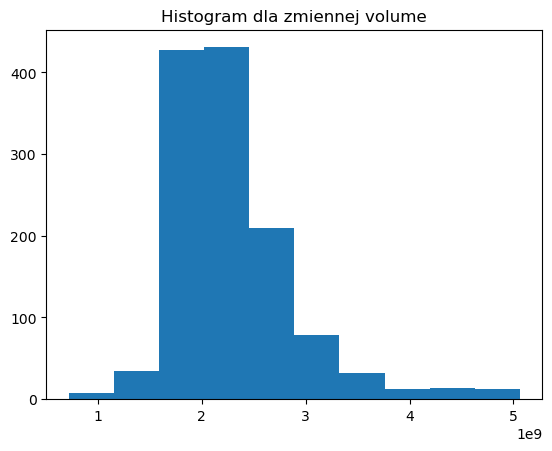

In [48]:
plt.hist(df["Volume"])
plt.title("Histogram dla zmiennej volume")

Użyjmy reguły Freedmana Diaconisa do wyliczenia opytmalnej ilości przedziałów.
$$ h = 2 \cdot IQR \cdot n^{-1/3} $$
$$ n_{bins} = \frac{max(X) - min(X)}{h} $$

In [37]:
import numpy as np
volume = df["Volume"]
IQR_Volume = np.percentile(volume, 75) - np.percentile(volume, 25)
n=len(volume)
h = 2*IQR_Volume/(n**(1/3))
number_of_bins = (max(volume) - min(volume))//h
print(max(volume) - min(volume))
print(h)
print(number_of_bins)

4341129532.0
113588883.57685658
38.0


Text(0.5, 1.0, 'Histogram dla reguły Freedmana-Diaconisa')

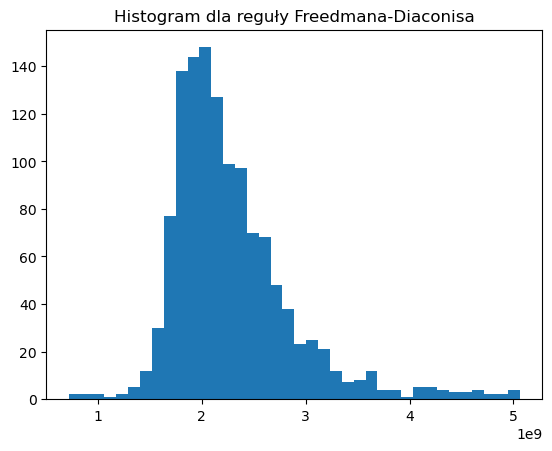

In [49]:
plt.hist(volume, bins=int(number_of_bins))
plt.title("Histogram dla reguły Freedmana-Diaconisa")

Oraz dorysujmy wykres gęstości

Text(0.5, 1.0, 'Histogram gęstości dla zmniennej Volume')

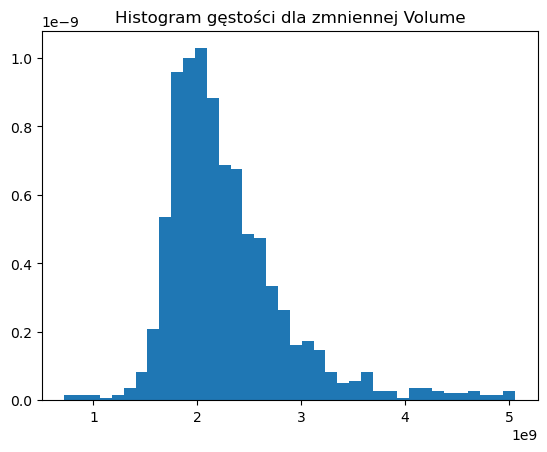

In [50]:
plt.hist(volume, bins=int(number_of_bins), density=True)
plt.title("Histogram gęstości dla zmniennej Volume")

Zastosujmy wykres pudełkowy

Text(0.5, 1.0, 'Wykres pudełowy dla zmiennej title')

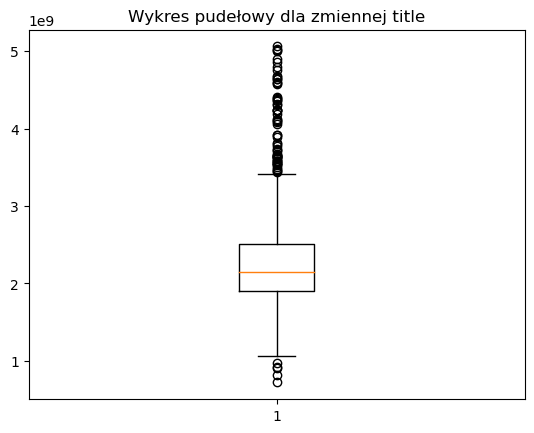

In [51]:
plt.boxplot(volume)
plt.title("Wykres pudełowy dla zmiennej title")

Zobaczmy jak wygląda skalowanie dla volume

In [45]:
print(volume)
scalled_volume = volume/(10**6)
print(scalled_volume)

Date
2018-01-02    1.870694e+09
2018-01-03    1.965922e+09
2018-01-04    2.052922e+09
2018-01-05    1.798122e+09
2018-01-08    1.801472e+09
                  ...     
2022-12-23    1.579203e+09
2022-12-27    1.753562e+09
2022-12-28    1.741219e+09
2022-12-29    1.734475e+09
2022-12-30    1.704123e+09
Name: Volume, Length: 1259, dtype: float64
Date
2018-01-02    1870.694444
2018-01-03    1965.922222
2018-01-04    2052.922222
2018-01-05    1798.122222
2018-01-08    1801.472222
                 ...     
2022-12-23    1579.202603
2022-12-27    1753.561968
2022-12-28    1741.218670
2022-12-29    1734.474936
2022-12-30    1704.123413
Name: Volume, Length: 1259, dtype: float64


Oraz powtórzmy proces dla skalowanych zmiennych

In [54]:
IQR_sVolume = np.percentile(scalled_volume, 75) - np.percentile(scalled_volume, 25)
n=len(scalled_volume)
h = 2*IQR_sVolume/(n**(1/3))
number_of_bins = (max(scalled_volume) - min(scalled_volume))//h
print(number_of_bins)


38.0


Text(0.5, 0, 'Zmienna volume / (10^6)')

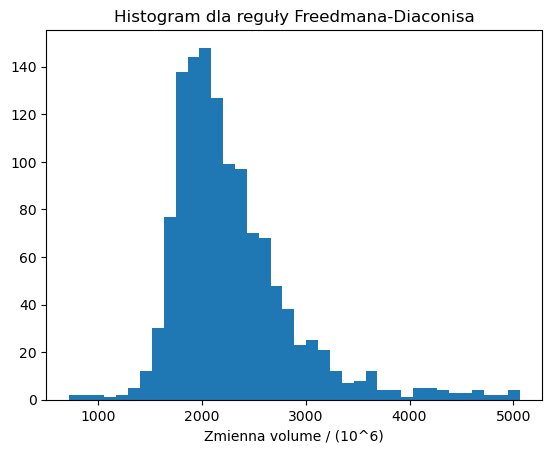

In [57]:
plt.hist(scalled_volume, bins=int(number_of_bins))
plt.title("Histogram dla reguły Freedmana-Diaconisa")
plt.xlabel("Zmienna volume / (10^6)")

Text(0.5, 0, 'Zmienna volume / (10^6)')

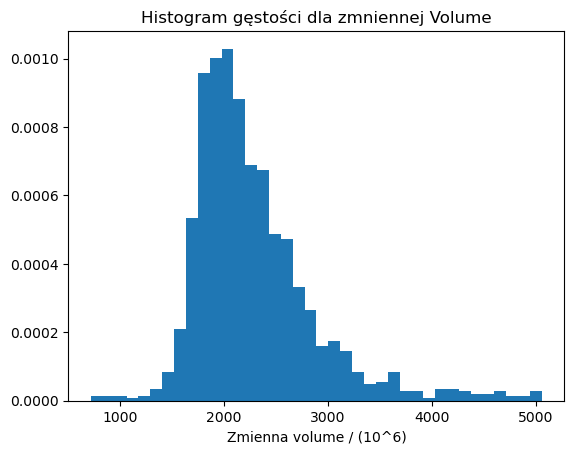

In [59]:
plt.hist(scalled_volume, bins=int(number_of_bins), density=True)
plt.title("Histogram gęstości dla zmniennej Volume")
plt.xlabel("Zmienna volume / (10^6)")

x-label jest czytelniejszy po przeskalowaniu, dało sporo do czytelności.

Text(0, 0.5, 'volume / (10^6)')

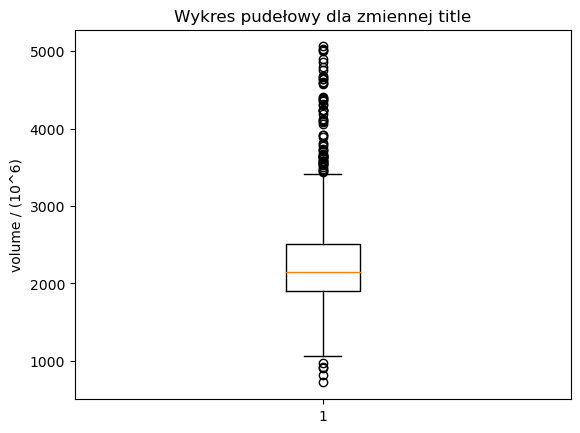

In [61]:
plt.boxplot(scalled_volume)
plt.title("Wykres pudełowy dla zmiennej title")
plt.ylabel("volume / (10^6)")

Zadanie 2

In [62]:
df2 = pd.read_csv("waw_weather_monthly.csv")
df2.head()


,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,windspeed_10m_max
0,January,2.53,-1.46,-2.08,-6.49,2.17,22.97
1,February,5.79,0.23,1.25,-4.45,2.26,23.91
2,March,7.36,-1.94,3.36,-6.14,0.14,14.35
3,April,10.39,2.35,6.97,-1.38,2.12,16.93
4,May,18.42,8.79,16.03,5.85,2.17,19.57


Dodajmy amplitudę

In [63]:
df2['amplitude'] = df2['temperature_2m_max'] - df2['temperature_2m_min']
df2.head()

,time,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,windspeed_10m_max,amplitude
0,January,2.53,-1.46,-2.08,-6.49,2.17,22.97,3.99
1,February,5.79,0.23,1.25,-4.45,2.26,23.91,5.56
2,March,7.36,-1.94,3.36,-6.14,0.14,14.35,9.30
3,April,10.39,2.35,6.97,-1.38,2.12,16.93,8.04
4,May,18.42,8.79,16.03,5.85,2.17,19.57,9.63


Oraz zróbmy wykres słupkowy

<BarContainer object of 12 artists>

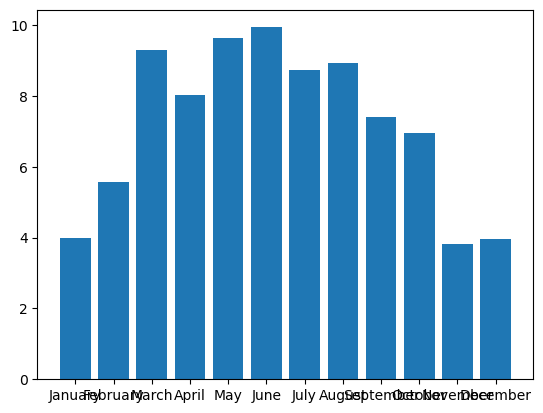

In [71]:
plt.bar(df2.time, df2['amplitude'])

xlabel są nieczytelne, co poprawimy dodając argument z polecenia

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

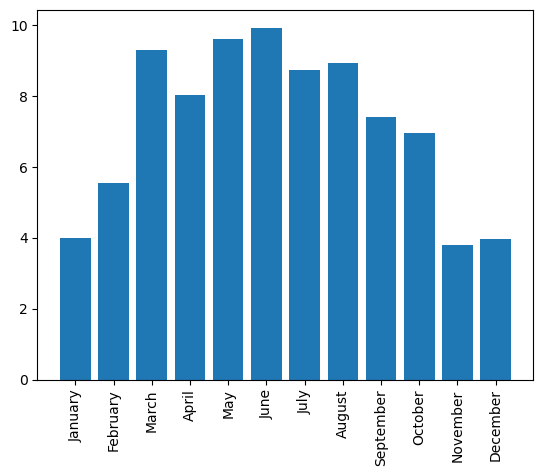

In [72]:
plt.bar(df2.time, df2['amplitude'])
plt.xticks(rotation=90)

Drugi podpunkt, dodałem od siebie jeszcze poziomie patrzenie, lepiej mi się wtedy sprawdza

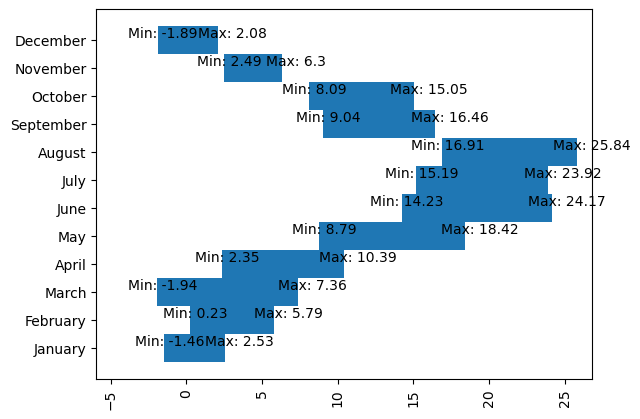

In [90]:
plt.barh(df2.time, df2['amplitude'], left=df2['temperature_2m_min'], label='Amplitude', height=1)
plt.xticks(rotation=90)
plt.xlim(left = min(df2['temperature_2m_min']) - 4 ,right = max(df2['temperature_2m_max']) +1 )

for index, row in df2.iterrows():
    plt.annotate(f'Min: {row["temperature_2m_min"]}', xy=(row['temperature_2m_min'] - 0.1, index),
                 xytext=(5, 5), textcoords='offset points', ha='center', va='center', color='black')
    
    plt.annotate(f'Max: {row["temperature_2m_max"]}', xy=(row['temperature_2m_min'] + row['amplitude'] + 0.5, index),
                 xytext=(5, 5), textcoords='offset points', ha='center', va='center', color='black')


Zadanie 3 


In [92]:
df3 = pd.read_csv('world_bank_co2.csv')
df3.head()

,Country Name,Country Code,Region,Population,CO2/capita,"GDP/capita, PPP"
0,Afghanistan,AFG,Asia,37769499.0,0.160976,2167.704111
1,Angola,AGO,Africa,32353588.0,0.779203,6881.076241
2,Albania,ALB,Europe,2854191.0,1.692248,14407.365691
3,United Arab Emirates,ARE,Asia,9211657.0,20.502283,74811.690215
4,Argentina,ARG,Americas,44938712.0,3.740650,23003.277181


Text(0, 0.5, 'GDP/capita, PPP')

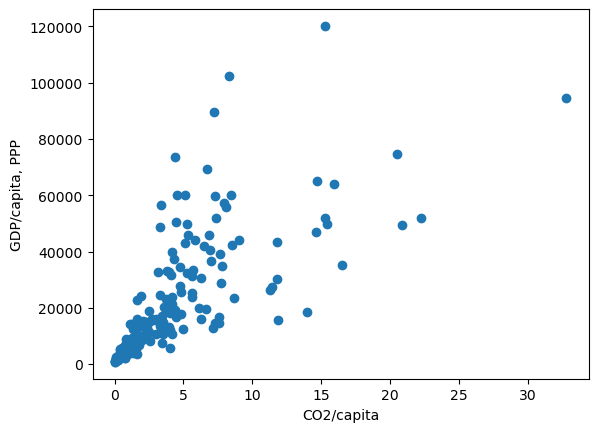

In [95]:
plt.scatter(df3["CO2/capita"], df3["GDP/capita, PPP"])
plt.xlabel("CO2/capita")
plt.ylabel("GDP/capita, PPP")

<Axes: xlabel='CO2/capita', ylabel='GDP/capita, PPP'>

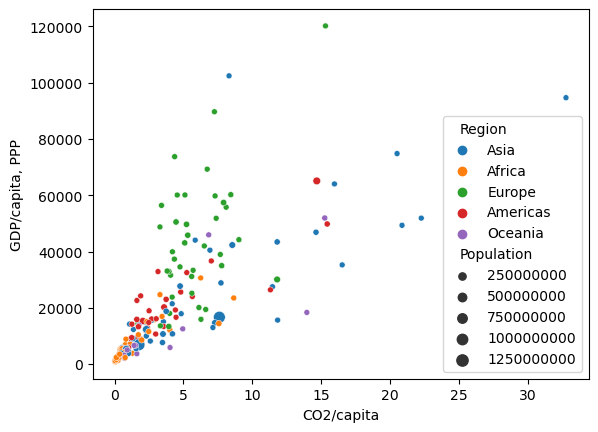

In [101]:
import seaborn as sns
sns.scatterplot(data=df3, x="CO2/capita", y="GDP/capita, PPP",hue="Region", size="Population")

<Axes: xlabel='CO2/capita', ylabel='GDP/capita, PPP'>

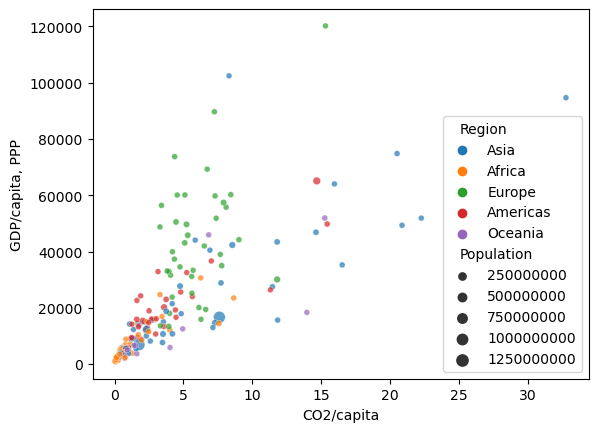

In [105]:
sns.scatterplot(data=df3, x="CO2/capita", y="GDP/capita, PPP",hue="Region", size="Population", alpha = 0.7)

Mi ten alpha mało pomógł, ale może.

Zadanie 4

In [110]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


InvalidIndexError: (slice(None, None, None), 0)

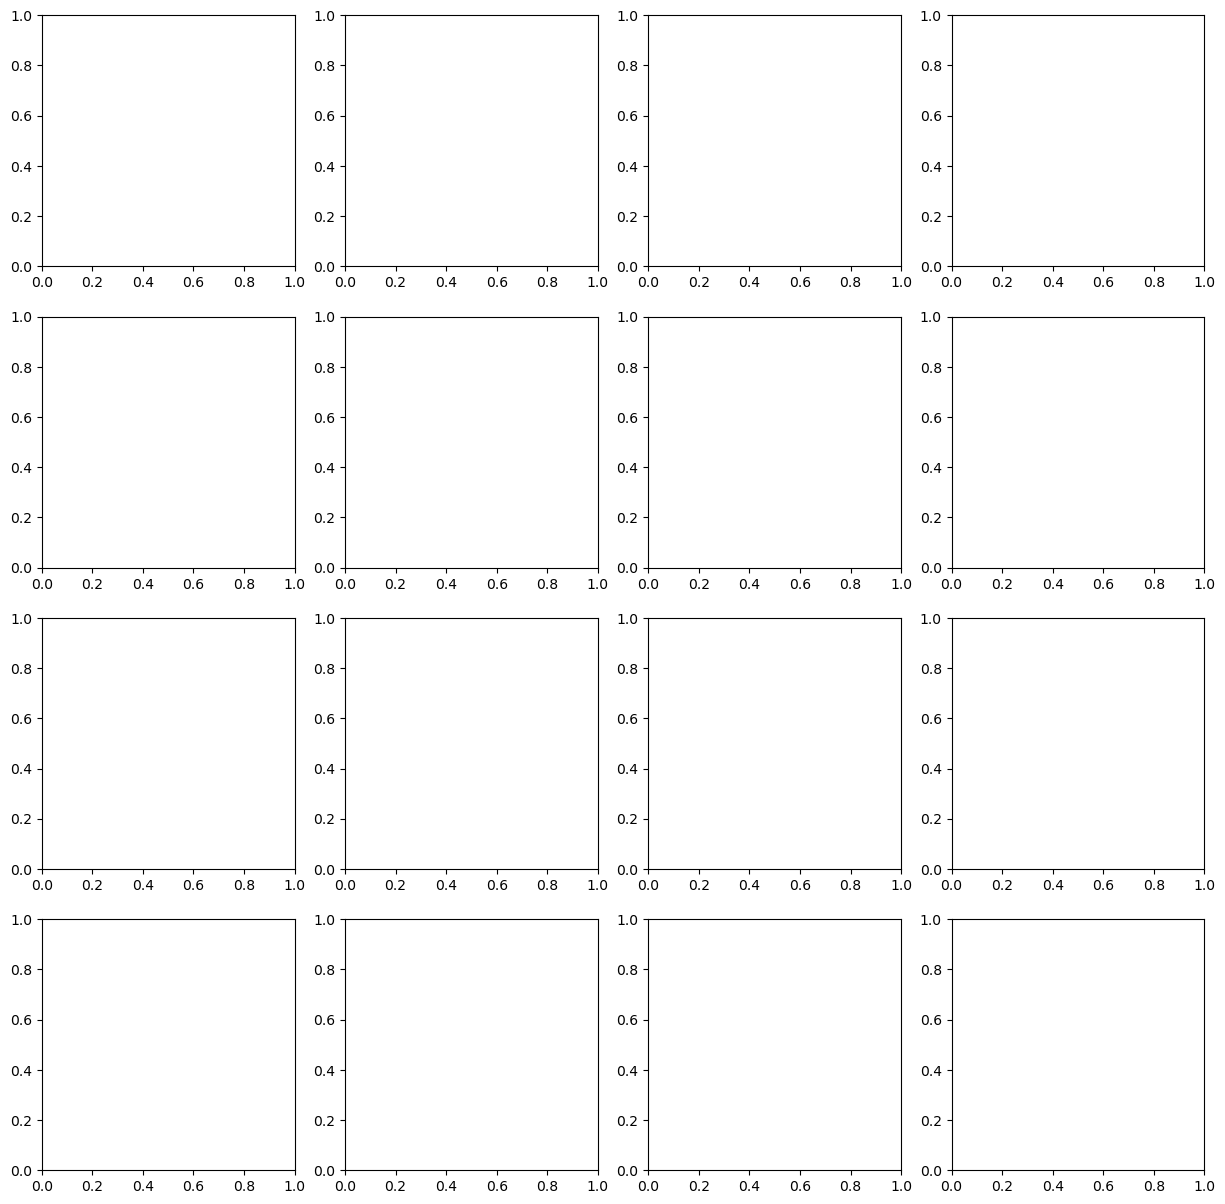

In [112]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
